In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/heart_failure_clinical_records_dataset.csv')

#Check number of rows and columns in the dataset
print("The dataset has %d rows and %d columns." % df.shape)

The dataset has 299 rows and 13 columns.


In [4]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [5]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


# **Exploring the dataset**

Outcome is the target column in the dataset. Outcome '1' is with diabetes and '0' is without diabetes, we get their total counts in the dataset. Other columns in the dataset will be input to the models. Let us have a look at the count of Outcome columns.

In [7]:
sns.countplot(x='DEATH_EVENT',data=df)
plt.show()

NameError: ignored

In [ ]:
grouped = df.groupby('DEATH_EVENT').agg({'age':['mean', 'std', min, max],
                                       'anaemia':['mean', 'std', min, max],
                                       'creatinine_phosphokinase':['mean', 'std', min, max],
                                       'diabetes':['mean', 'std', min, max],
                                       'ejection_fraction':['mean', 'std', min, max],
                                       'high_blood_pressure':['mean', 'std', min, max],
                                       'platelets':['mean', 'std', min, max],
                                       'serum_creatinine':['mean', 'std', min, max],
                                      'serum_sodium':['mean', 'std', min, max],
                                     'sex':['mean', 'std', min, max],
                                     'smoking':['mean', 'std', min, max],
                                     'time':['mean', 'std', min, max]
                                      })
grouped.columns = ["_".join(x) for x in grouped.columns.ravel()]
grouped # or grouped.T

,age_mean,age_std,age_min,age_max,anaemia_mean,anaemia_std,anaemia_min,anaemia_max,creatinine_phosphokinase_mean,creatinine_phosphokinase_std,...,sex_min,sex_max,smoking_mean,smoking_std,smoking_min,smoking_max,time_mean,time_std,time_min,time_max
DEATH_EVENT,,,,,,,,,,,,,,,,,,,,,
0,58.761906,10.637890,40.0,90.0,0.408867,0.492840,0,1,540.054187,753.799572,...,0,1,0.325123,0.469579,0,1,158.339901,67.742872,12,285
1,65.215281,13.214556,42.0,95.0,0.479167,0.502188,0,1,670.197917,1316.580640,...,0,1,0.312500,0.465946,0,1,70.885417,62.378281,4,241


<Figure size 1200x800 with 0 Axes>

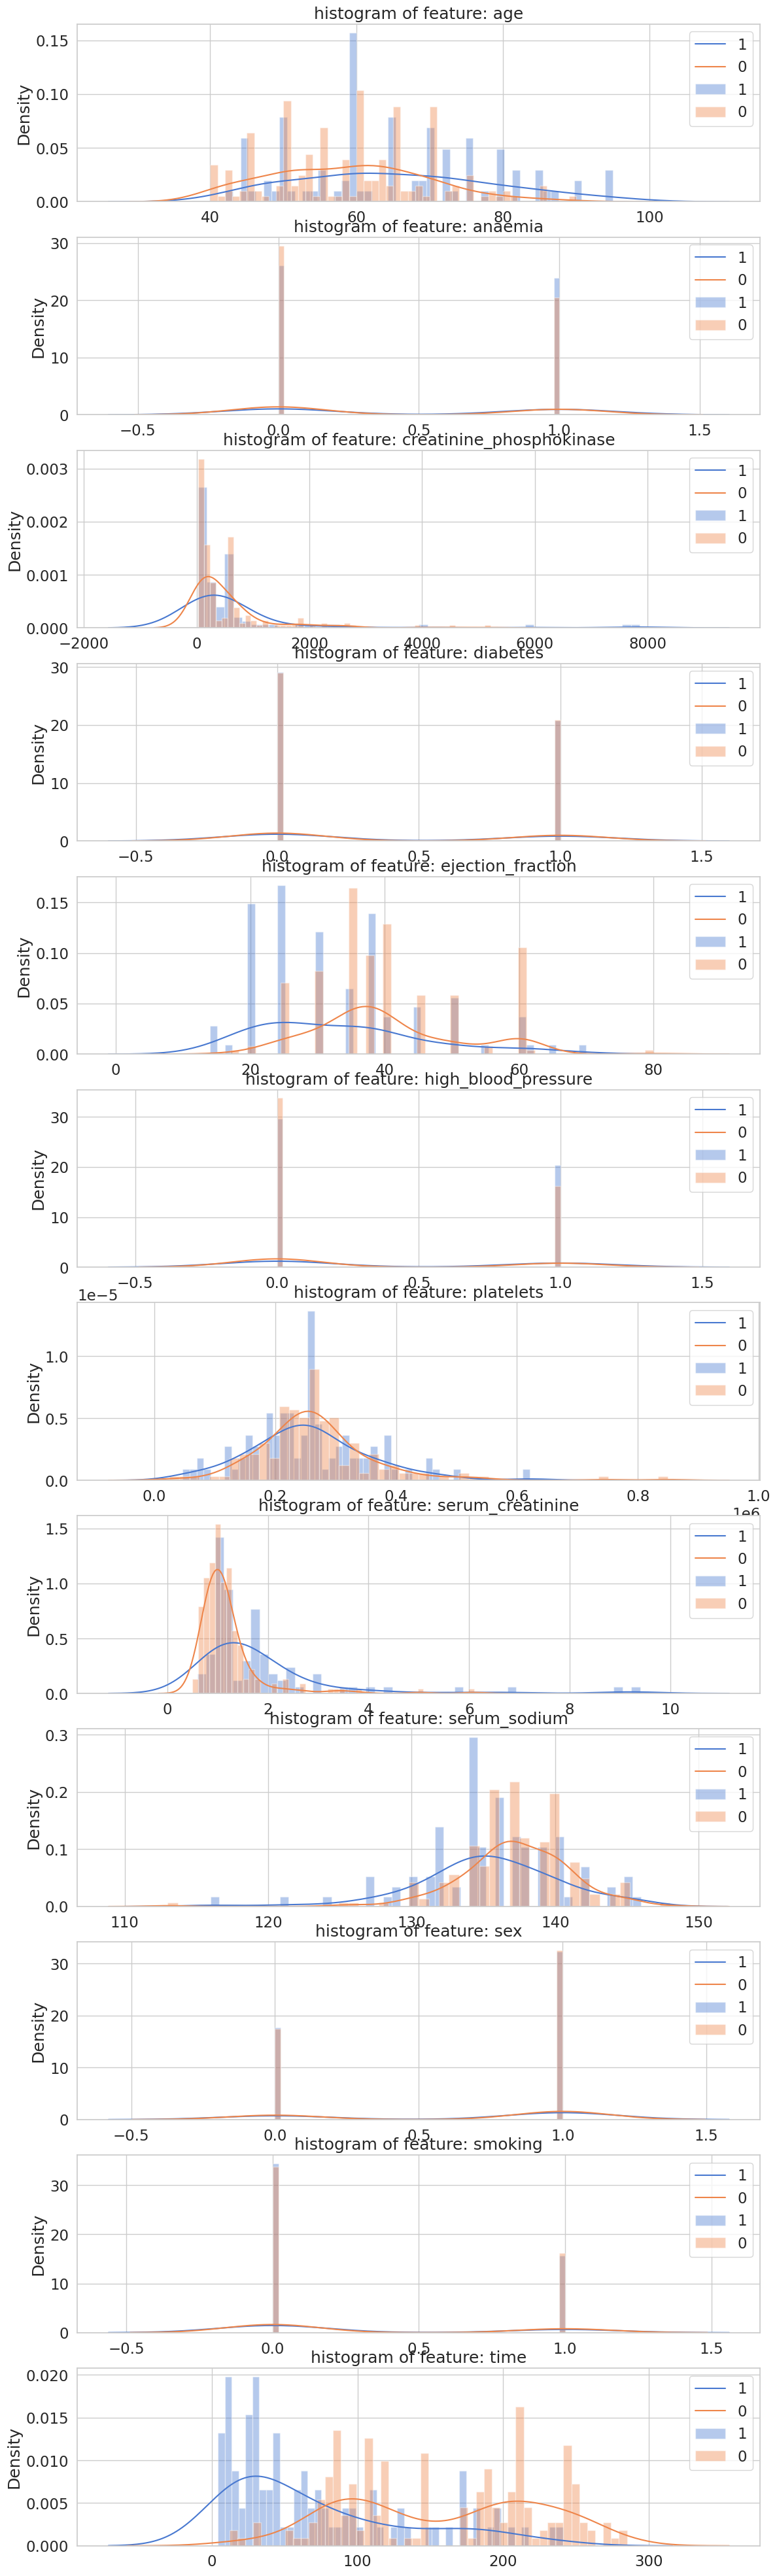

In [ ]:
plt.subplots_adjust(top=5)
columns=df.columns[:12]
plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, cn in enumerate(df[columns]):
    ax = plt.subplot(gs[i])
    sns.distplot(df[cn][df.DEATH_EVENT == 1], bins=50)
    sns.distplot(df[cn][df.DEATH_EVENT == 0], bins=50)
    ax.set_xlabel('')
    plt.legend(['1','0','1','0'])
    ax.set_title('histogram of feature: ' + str(cn))
plt.show()

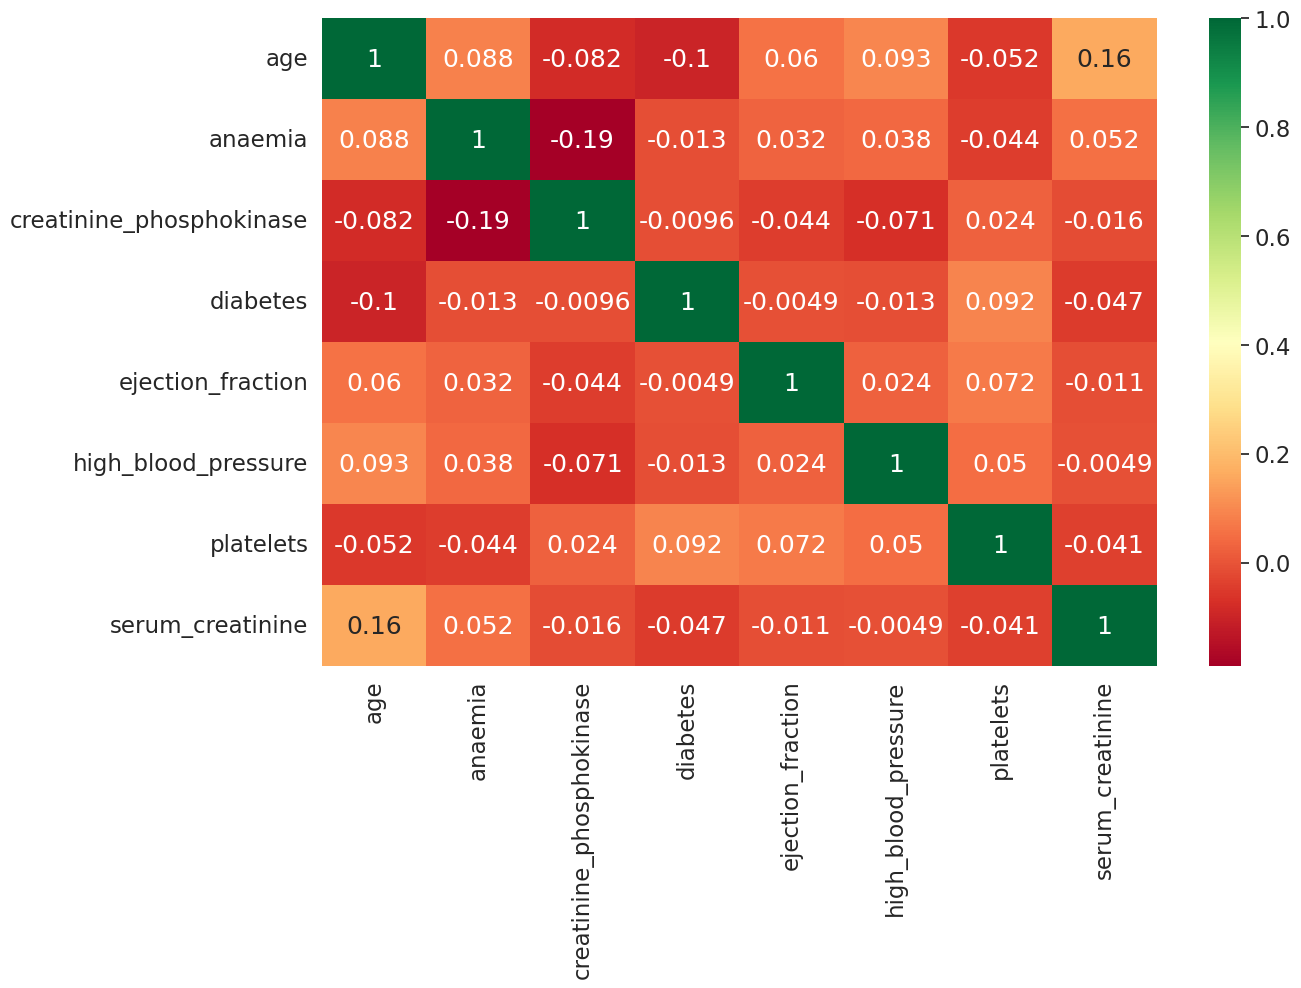

In [ ]:
sns.heatmap(df[df.columns[:8]].corr(),annot=True,cmap='RdYlGn')
fig=plt.gcf()
plt.show()

# **Model Building**

In [ ]:
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

# **Methods for evaluating the performance of a Classifier**


## **Holdout Method**

In [ ]:
outcome=df['DEATH_EVENT']
data=df[df.columns[:8]]

train,test = train_test_split(df,test_size=0.25,random_state=0,stratify=df['DEATH_EVENT'])# stratify the outcome

train_X=train[train.columns[:8]]
test_X=test[test.columns[:8]]
train_Y=train['DEATH_EVENT']
test_Y=test['DEATH_EVENT']

In [ ]:
print(train_X.shape)
print(test_X.shape)

(224, 8)
(75, 8)


### **Feature Centering and Scaling**

train_X and test_X datasets are centered to zero and normalized by the std dev. This helps in faster gradient descent.


In [ ]:
features = train_X.columns.values

for feature in features:
    mean, std = df[feature].mean(), df[feature].std()
    train_X.loc[:, feature] = (train_X[feature] - mean) / std
    test_X.loc[:, feature] = (test_X[feature] - mean) / std

### **Compare model accuracies**

In [ ]:
accuracy_scores=[]

classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree', 'Random forest', 'Naive Bayes']

models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),
        KNeighborsClassifier(n_neighbors=3),DecisionTreeClassifier(),
        RandomForestClassifier(n_estimators=100,random_state=0), GaussianNB()]

for i in models:
    model = i
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    accuracy_scores.append(metrics.accuracy_score(prediction,test_Y))

models_dataframe=pd.DataFrame(accuracy_scores,index=classifiers)
models_dataframe.columns=['Accuracy']
models_dataframe.sort_values(['Accuracy'], ascending=False)

,Accuracy
Radial Svm,0.773333
Linear Svm,0.760000
Logistic Regression,0.746667
Naive Bayes,0.746667
Decision Tree,0.720000
Random forest,0.720000
KNN,0.640000


In [ ]:
modelRF= RandomForestClassifier(n_estimators=100,random_state=0)
modelRF.fit(train_X,train_Y)
predictionRF=modelRF.predict(test_X)
pd.Series(modelRF.feature_importances_,index=train_X.columns).sort_values(ascending=False)

serum_creatinine            0.219215
ejection_fraction           0.215438
creatinine_phosphokinase    0.172124
age                         0.170690
platelets                   0.147867
anaemia                     0.027973
high_blood_pressure         0.025242
diabetes                    0.021450
dtype: float64

## **k-fold Cross validation**

In [ ]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.preprocessing import StandardScaler #Standardisation

In [ ]:
kfold = KFold(n_splits=10, random_state=42, shuffle=True) # k=10 splits the data into 10 equal parts

In [ ]:
# Starting with the original dataset and then doing centering and scaling
features=df[df.columns[:12]]
features_standard=StandardScaler().fit_transform(features)# Gaussian Standardisation
X=pd.DataFrame(features_standard,columns=['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
                                          'ejection_fraction', 'high_blood_pressure', 'platelets',
                                          'serum_creatinine','serum_sodium','sex','smoking','time'])
X['DEATH_EVENT']=df['DEATH_EVENT']

In [ ]:
xyz=[]
accuracy=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree', 'Random forest', 'Naive Bayes']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),
        KNeighborsClassifier(n_neighbors=3),DecisionTreeClassifier(),
        RandomForestClassifier(n_estimators=100,random_state=0), GaussianNB()]

for i in models:
    model = i
    cv_result = cross_val_score(model,X[X.columns[:8]], X['DEATH_EVENT'], cv = kfold, scoring = "accuracy")
    xyz.append(cv_result.mean())
    accuracy.append(cv_result)

cv_models_dataframe=pd.DataFrame(xyz, index=classifiers)
cv_models_dataframe.columns=['CV Mean']
cv_models_dataframe
cv_models_dataframe.sort_values(['CV Mean'], ascending=False)

,CV Mean
Random forest,0.746322
Linear Svm,0.742989
Logistic Regression,0.726322
Radial Svm,0.709425
Naive Bayes,0.702874
Decision Tree,0.682299
KNN,0.662644


# **Comparing data mining methods**

We often need to compare two different learning methods on the same problem
to see which is the better one to use. It seems simple: estimate the error using
cross-validation (or any other suitable estimation procedure), perhaps repeated
several times, and choose the scheme whose estimate is smaller. This is quite
sufficient in many practical applications: if one method has a lower estimated
error than another on a particular dataset, the best we can do is to use the former
method’s model.

In [ ]:
box=pd.DataFrame(accuracy,index=[classifiers])
boxT = box.T

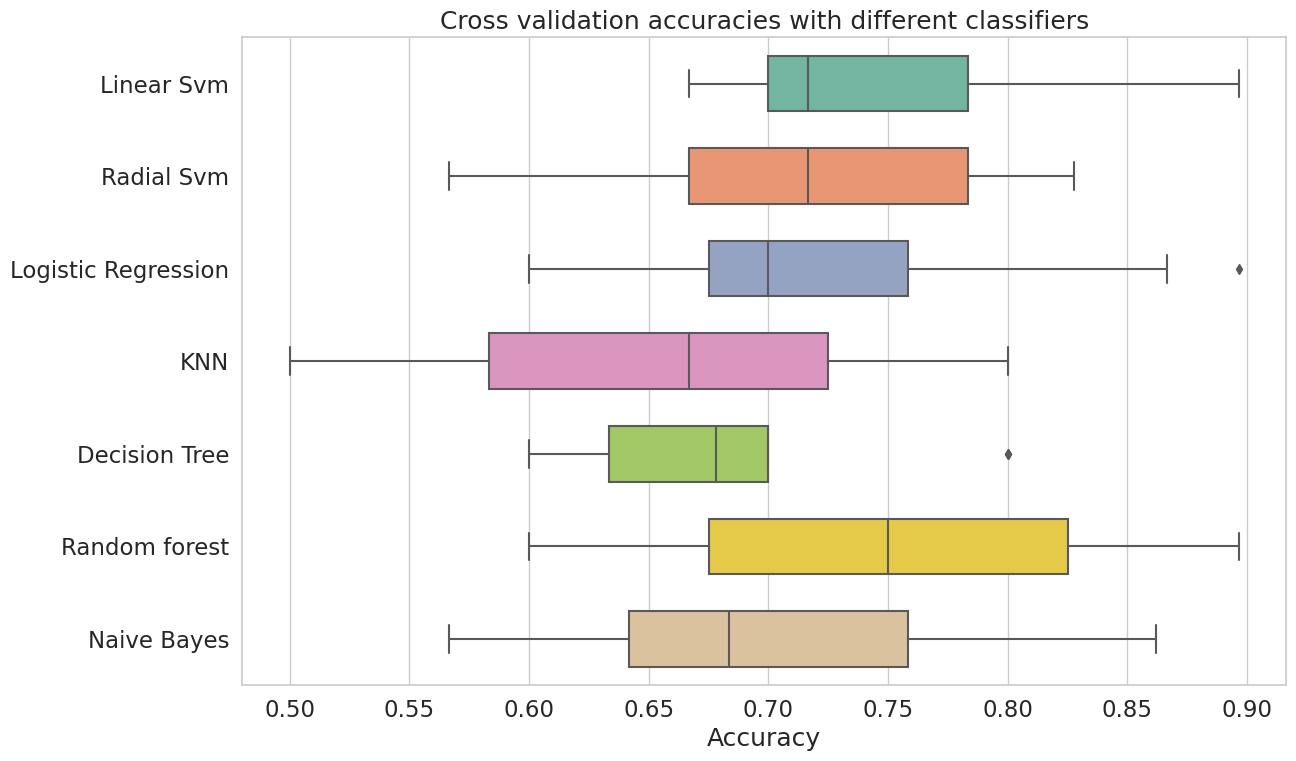

In [ ]:
ax = sns.boxplot(data=boxT, orient="h", palette="Set2", width=.6)
ax.set_yticklabels(classifiers)
ax.set_title('Cross validation accuracies with different classifiers')
ax.set_xlabel('Accuracy')
plt.show()

# **Ensembling**

In ensemble methods, we create multiple models and then combine them that gives us better results. Enseble methods typically gives better accuracy than a single model. The models used to create such ensemble models are called base models.

Let us do ensembling with Voting Ensemble. First we create two or more standalone models on the training dataset. A voting classifier wrap the models to get average predictions. Models with higher individual accuracies are weighted higher.

Since KNN, Decision Tree and Random Forest models have wide range of accuracies in K-fold validation, they are not considered in ensembling the models.

Other the models: Linear SVM, Radial SVM and Logistic Regression are combined together to get an ensemble model.

In [ ]:
linear_svm=svm.SVC(kernel='linear',C=0.1,gamma=10, probability=True)
radial_svm=svm.SVC(kernel='rbf',C=0.1,gamma=10, probability=True)
lr=LogisticRegression(C=0.1)

In [ ]:
from sklearn.ensemble import VotingClassifier #for Voting Classifier

## **Ensamble with 3 classifiers combined: Linear SVM, radial SVM, Log Reg**

In [ ]:
ensembleModel=VotingClassifier(estimators=[('Linear_svm',linear_svm), ('Radial_svm', radial_svm), ('Logistic Regression', lr)],
                                            voting='soft', weights=[3,1,2])

ensembleModel.fit(train_X,train_Y)
predictEnsemble = ensembleModel.predict(test_X)

In [ ]:
print('Accuracy of ensembled model with all the 3 classifiers is:', np.round(ensembleModel.score(test_X,test_Y), 4))

Accuracy of ensembled model with all the 3 classifiers is: 0.7467


In [ ]:
from sklearn import metrics
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score,
                             classification_report, f1_score, average_precision_score, precision_recall_fscore_support)

# **ROC curve with AUC**

In [ ]:
from sklearn import metrics
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score,
                             classification_report, f1_score, average_precision_score, precision_recall_fscore_support)

### **For the ensembling method**

In [ ]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(test_Y, predictEnsemble)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.6151960784313725

Text(0.5, 0, 'False Positive Rate')

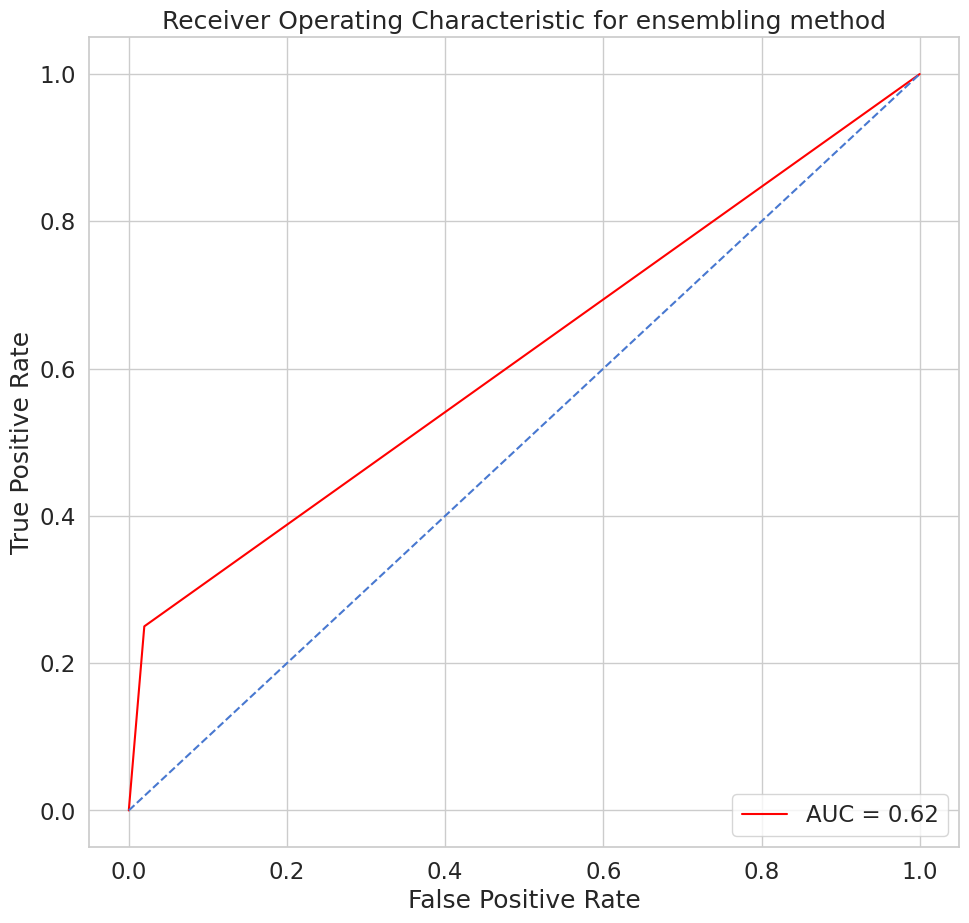

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic for ensembling method')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

### **For all methods**

In [ ]:
# Logistic regression
modelLR = LogisticRegression()
modelLR.fit(train_X,train_Y)
y_pred_prob_lr = modelLR.predict_proba(test_X)[:,1]
fpr_lr, tpr_lr, thresholds_lr = roc_curve(test_Y, y_pred_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)
precision_lr, recall_lr, th_lr = precision_recall_curve(test_Y, y_pred_prob_lr)

# SVM with rbf
modelSVMrbf=svm.SVC(kernel='rbf', probability=True)
modelSVMrbf.fit(train_X,train_Y)
y_pred_prob_SVMrbf = modelSVMrbf.predict_proba(test_X)[:,1]
fpr_SVMrbf, tpr_SVMrbf, thresholds_SVMrbf = roc_curve(test_Y, y_pred_prob_SVMrbf)
roc_auc_SVMrbf = auc(fpr_SVMrbf, tpr_SVMrbf)
precision_SVMrbf, recall_SVMrbf, th_SVMrbf = precision_recall_curve(test_Y, y_pred_prob_SVMrbf)

# SVM with linear
modelSVMlinear=svm.SVC(kernel='linear', probability=True)
modelSVMlinear.fit(train_X,train_Y)
y_pred_prob_SVMlinear = modelSVMlinear.predict_proba(test_X)[:,1]
fpr_SVMlinear, tpr_SVMlinear, thresholds_SVMlinear = roc_curve(test_Y, y_pred_prob_SVMlinear)
roc_auc_SVMlinear = auc(fpr_SVMlinear, tpr_SVMlinear)
precision_SVMlinear, recall_SVMlinear, th_SVMlinear = precision_recall_curve(test_Y, y_pred_prob_SVMlinear)

# KNN
modelKNN = KNeighborsClassifier(n_neighbors=3)
modelKNN.fit(train_X,train_Y)
y_pred_prob_KNN = modelKNN.predict_proba(test_X)[:,1]
fpr_KNN, tpr_KNN, thresholds_KNN = roc_curve(test_Y, y_pred_prob_KNN)
roc_auc_KNN = auc(fpr_KNN, tpr_KNN)
precision_KNN, recall_KNN, th_KNN = precision_recall_curve(test_Y, y_pred_prob_KNN)


# Decision Tree
modelTree=DecisionTreeClassifier()
modelTree.fit(train_X,train_Y)
y_pred_prob_Tree = modelTree.predict_proba(test_X)[:,1]
fpr_Tree, tpr_Tree, thresholds_Tree = roc_curve(test_Y, y_pred_prob_Tree)
roc_auc_Tree = auc(fpr_Tree, tpr_Tree)
precision_Tree, recall_Tree, th_Tree = precision_recall_curve(test_Y, y_pred_prob_Tree)

# Random forest
modelRF= RandomForestClassifier(n_estimators=100,random_state=0)
modelRF.fit(train_X,train_Y)
y_pred_prob_rf = modelRF.predict_proba(test_X)[:,1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(test_Y, y_pred_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
precision_rf, recall_rf, th_rf = precision_recall_curve(test_Y, y_pred_prob_rf)


# Naive Bayes
modelNB= GaussianNB()
modelNB.fit(train_X,train_Y)
y_pred_prob_nb = modelNB.predict_proba(test_X)[:,1]
fpr_nb, tpr_nb, thresholds_nb = roc_curve(test_Y, y_pred_prob_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)
precision_nb, recall_nb, th_nb = precision_recall_curve(test_Y, y_pred_prob_nb)

# Ensemble
y_pred_prob_en = ensembleModel.predict_proba(test_X)[:,1]
fpr_en, tpr_en, thresholds_en = roc_curve(test_Y, y_pred_prob_en)
roc_auc_en = auc(fpr_en, tpr_en)
precision_en, recall_en, th_en = precision_recall_curve(test_Y, y_pred_prob_en)

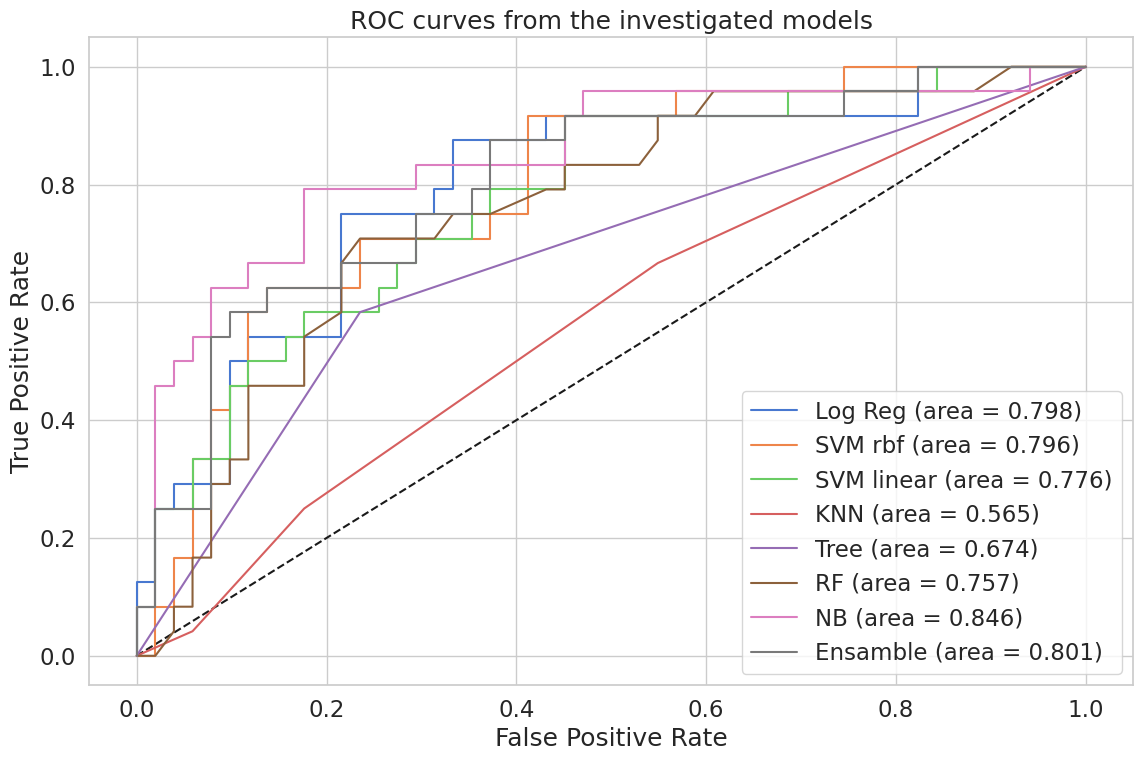

In [ ]:
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='Log Reg (area = %0.3f)' % roc_auc_lr)
plt.plot(fpr_SVMrbf, tpr_SVMrbf, label='SVM rbf (area = %0.3f)' % roc_auc_SVMrbf)
plt.plot(fpr_SVMlinear, tpr_SVMlinear, label='SVM linear (area = %0.3f)' % roc_auc_SVMlinear)
plt.plot(fpr_KNN, tpr_KNN, label='KNN (area = %0.3f)' % roc_auc_KNN)
plt.plot(fpr_Tree, tpr_Tree, label='Tree (area = %0.3f)' % roc_auc_Tree)
plt.plot(fpr_rf, tpr_rf, label='RF (area = %0.3f)' % roc_auc_rf)
plt.plot(fpr_nb, tpr_nb, label='NB (area = %0.3f)' % roc_auc_nb)
plt.plot(fpr_en, tpr_en, label='Ensamble (area = %0.3f)' % roc_auc_en)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves from the investigated models')
plt.legend(loc='best')
plt.show()

## **Precision-recall curve comparing the models**

Information retrieval researchers define parameters called *recall* and *precision*:
\begin{equation*}
    \begin{split}
        {recall} &= \frac{{number of documents retrieved that are relevant}}{{total number of documents that are relevant}}\\
        {precision} &= \frac{{number of documents retrieved that are relevant}}{{total number of documents that are retrieved }}
    \end{split}
\end{equation*}


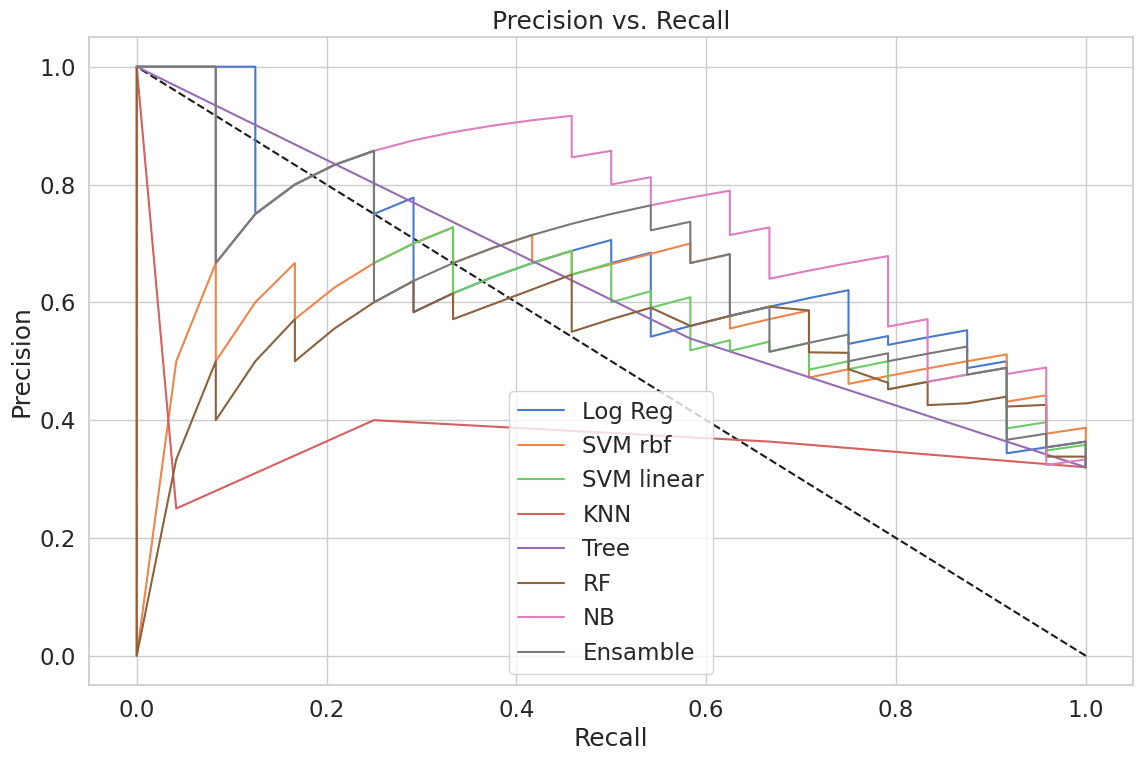

In [ ]:
plt.plot([1, 0], [0, 1], 'k--')
plt.plot(recall_lr, precision_lr, label='Log Reg')
plt.plot(recall_SVMrbf, precision_SVMrbf, label='SVM rbf')
plt.plot(recall_SVMlinear, precision_SVMlinear, label='SVM linear')
plt.plot(recall_KNN, precision_KNN, label='KNN')
plt.plot(recall_Tree, precision_Tree, label='Tree')
plt.plot(recall_rf, precision_rf, label='RF')
plt.plot(recall_nb, precision_nb, label='NB')
plt.plot(recall_en, precision_en, label='Ensamble')
plt.title('Precision vs. Recall')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')
plt.show()

# **Predictive Outcomes**

## **Confusion matrix with ensemble model**

Let us look at the confusion matrix from the ensamble classifier.
First define a function to plot confusion matrix

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

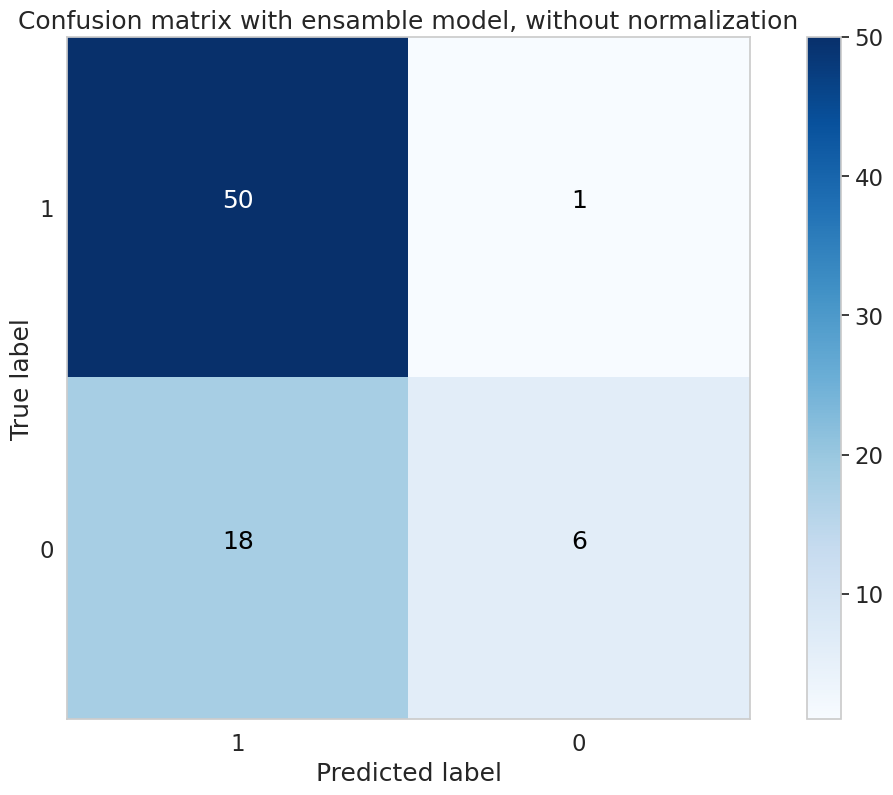

In [ ]:
class_names = test_Y.unique()
cmEnsamble = confusion_matrix(test_Y, predictEnsemble)
plt.grid(False)
plot_confusion_matrix(cmEnsamble, classes=class_names, title='Confusion matrix with ensamble model, without normalization')


# **Cost-sensitive learning**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras import optimizers
from keras.callbacks import ReduceLROnPlateau

# fix random seed for reproducibility
np.random.seed(42)

In [ ]:
train_Y = to_categorical(train_Y, num_classes = 2)
test_Y = to_categorical(test_Y, num_classes = 2)

In [ ]:
# Confirm the train-test split ratio
print(np.shape(train_X))
print(np.shape(train_Y))
print(np.shape(test_X))
print(np.shape(test_Y))

(224, 8)
(224, 2)
(75, 8)
(75, 2)


## **1. Create the model using Keras**

input_dim = 8 since we have 8 input variable.
Here we are using 5 fully connected layers defined by using the Dense class (no particular reason for 5 layers, typically more layers are better). Number of neurons in the layers are the first argument (8, 12, 12, 8, 4 & 1 respecitvely here).
We use the default weight initialization in Keras which is between 0 to 0.05 assuming "uniform" distribution.
First 4 layers have "relu" activation and output layer has "sigmoid" activation. Sigmoid on the output layer ensures that we have output between 0 and 1.

We can piece it all together by adding each layer.


In [ ]:
# A regularizer that applies a L2 regularization penalty.
# The L2 regularization penalty is computed as: loss = l2 * reduce_sum(square(x))
# Try the model with and without the regularizer
from tensorflow.keras import regularizers
model = Sequential()
model.add(Dense(8, input_dim=8, activation='relu'))
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
#model.add(Dense(2, activation='sigmoid'))
model.add(Dense(2,kernel_regularizer=regularizers.L1L2(l1=1e-5,l2=1e-4),activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 8)                 72        
                                                                 
 dense_19 (Dense)            (None, 12)                108       
                                                                 
 dense_20 (Dense)            (None, 12)                156       
                                                                 
 dense_21 (Dense)            (None, 8)                 104       
                                                                 
 dense_22 (Dense)            (None, 4)                 36        
                                                                 
 dense_23 (Dense)            (None, 2)                 10        
                                                                 
Total params: 486 (1.90 KB)
Trainable params: 486 (1.9

## **2. Compile the model**

Now the model is ready, we can compile it (using tensorflow under the hood or backend) and train it find the best weights for prediction. loss='binary_crossentropy' since the problem is binary classification.
optimizer='adam' since it is efficient and default default.
From metrics we collect the accuracy.


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

## **3. Fit model**

We train the model by calling fit() on training data.
The number of iteration through the whole training datset is called "epoch". It is set to 150 (higher the better).
The number of instances that are evaluated before a weight update in the network is performed is the the batch size. It is set to 50 (relatively small, the dataset is also small).

With the model.fit(), we shall also capture the accuracy each epoch.


In [ ]:
epoch = 150
batch_size = 50

history = model.fit(train_X, train_Y, batch_size = batch_size, epochs = epoch,
          validation_data = (test_X, test_Y), verbose = 2)

Epoch 1/150
5/5 - 2s - loss: 0.6944 - accuracy: 0.6786 - val_loss: 0.6844 - val_accuracy: 0.6800 - 2s/epoch - 433ms/step
Epoch 2/150
5/5 - 0s - loss: 0.6885 - accuracy: 0.6786 - val_loss: 0.6797 - val_accuracy: 0.6800 - 65ms/epoch - 13ms/step
Epoch 3/150
5/5 - 0s - loss: 0.6832 - accuracy: 0.6786 - val_loss: 0.6744 - val_accuracy: 0.6800 - 85ms/epoch - 17ms/step
Epoch 4/150
5/5 - 0s - loss: 0.6777 - accuracy: 0.6786 - val_loss: 0.6684 - val_accuracy: 0.6800 - 58ms/epoch - 12ms/step
Epoch 5/150
5/5 - 0s - loss: 0.6724 - accuracy: 0.6786 - val_loss: 0.6621 - val_accuracy: 0.6800 - 74ms/epoch - 15ms/step
Epoch 6/150
5/5 - 0s - loss: 0.6670 - accuracy: 0.6786 - val_loss: 0.6564 - val_accuracy: 0.6800 - 73ms/epoch - 15ms/step
Epoch 7/150
5/5 - 0s - loss: 0.6623 - accuracy: 0.6786 - val_loss: 0.6505 - val_accuracy: 0.6800 - 80ms/epoch - 16ms/step
Epoch 8/150
5/5 - 0s - loss: 0.6574 - accuracy: 0.6786 - val_loss: 0.6458 - val_accuracy: 0.6800 - 66ms/epoch - 13ms/step
Epoch 9/150
5/5 - 0s - lo

## **4. Evaluate model**

We evaluate the model on test dataset and obtain the score and accuracy.
Score is the evaluation of the loss function for a given input.


In [ ]:
score, acc = model.evaluate(test_X, test_Y)
print('Test score:', score)
print('Test accuracy:', acc)

3/3 [==============================] - 0s 6ms/step - loss: 0.5630 - accuracy: 0.7067
Test score: 0.5629631876945496
Test accuracy: 0.7066666483879089


### **Training and validation curves vs. epoch**

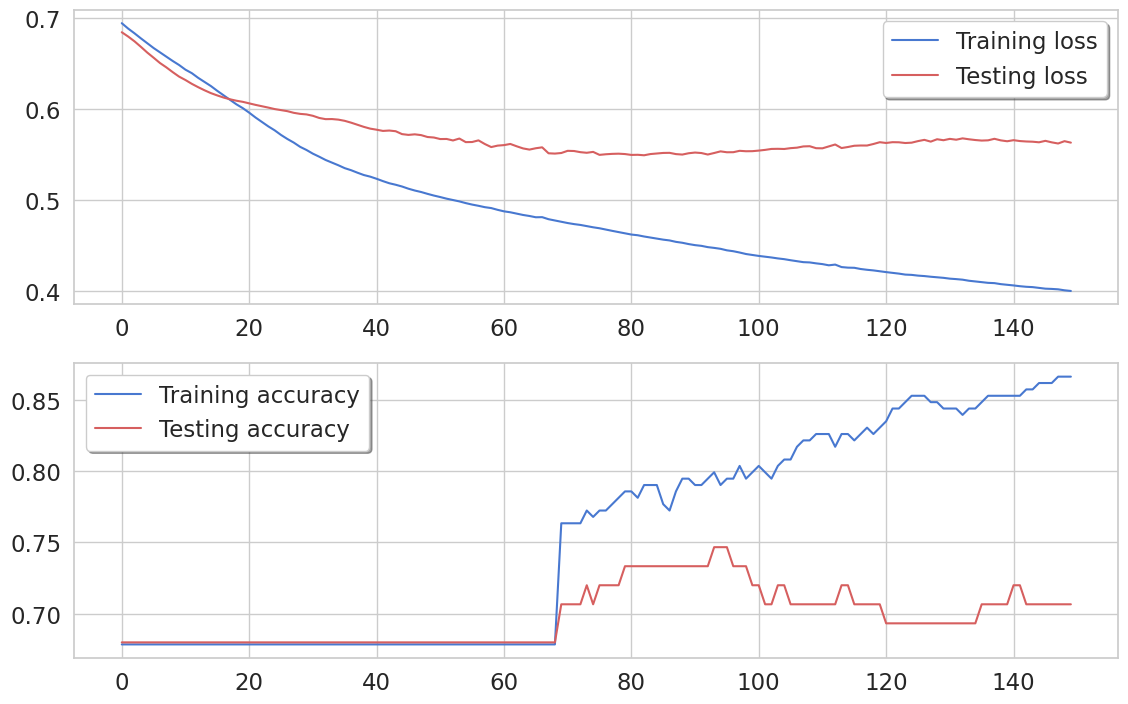

In [ ]:
# Plot the loss and accuracy curves for training and validation vs. epochs

fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="Testing loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Testing accuracy")
legend = ax[1].legend(loc='best', shadow=True)

plt.show()

### **Confusion matrix using this model**

Let us have a look at the correct and misclasssification in the confusion matrix.
I am using the below function for confusion matrix.

3/3 [==============================] - 0s 4ms/step


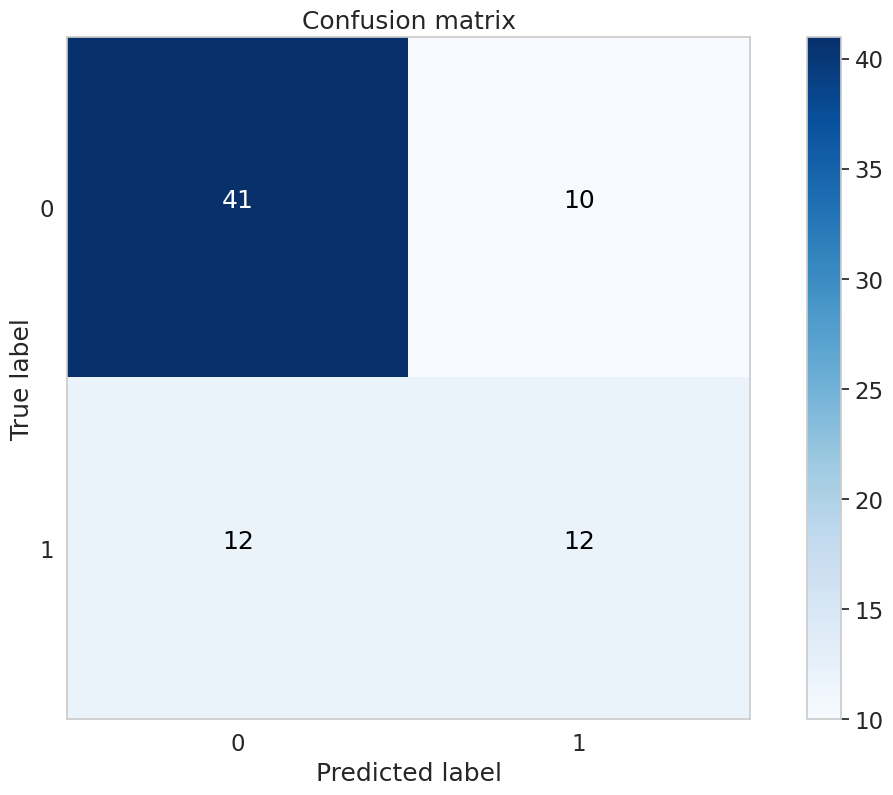

In [ ]:
# Predict the values from the validation dataset
Y_pred = model.predict(test_X)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred,axis = 1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(test_Y,axis = 1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(2))
plt.grid(False)
plt.show()